In [6]:
# Importing pakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
import xgboost as xgb
import pickle

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# import warnings
# warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/Users/anestrada/Documents/Estudio/Prueba_Tecnica_MeLi/diabetes+130-us+hospitals+for+years+1999-2008/diabetes_clean.csv')
data.head()

,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,25,1,41,1,0,0,1,No,0
1,1,3,59,18,0,0,9,Yes,0
2,1,2,11,13,0,1,6,Yes,0
3,1,2,44,16,0,0,7,Yes,0
4,1,1,51,8,0,0,5,Yes,0


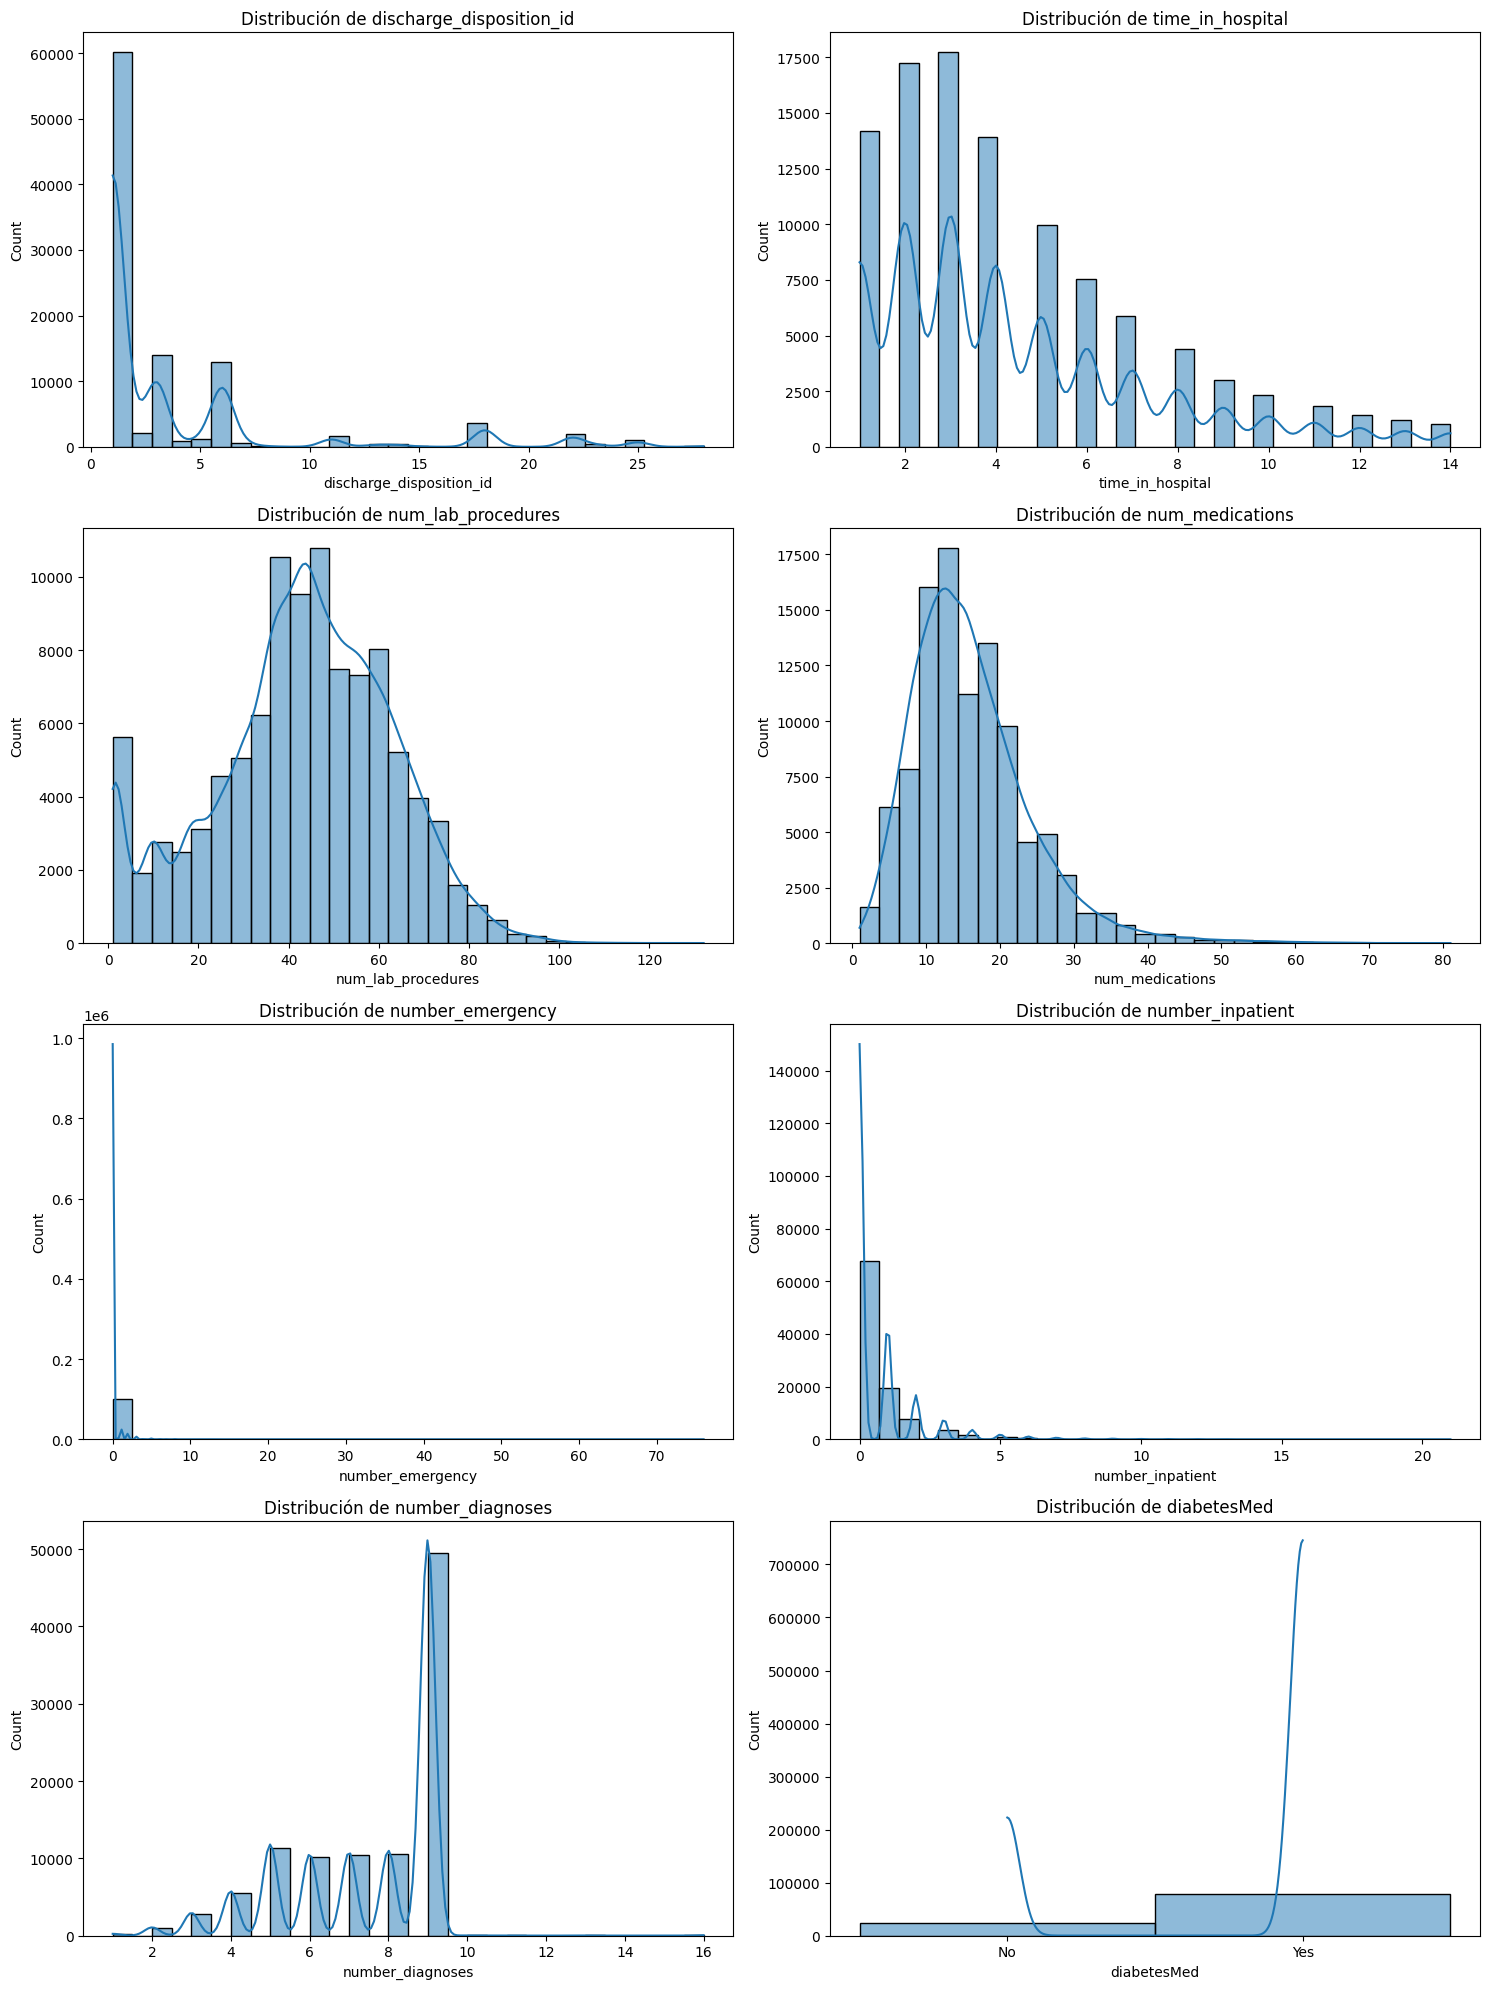

In [10]:
# Definir las columnas adicionales de interés
cols = data.columns[:-1]

num_vars = len(cols)
num_cols = 2
num_rows = math.ceil(num_vars / num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

# Eliminar los subplots vacíos si hay alguno
for i in range(num_vars, num_cols*num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [11]:
# Variables to log transform
log_transform_vars = ['number_emergency', 'number_inpatient']

# Log transform
data_log_transformed = data.copy()

for var in log_transform_vars:
    data_log_transformed[var] = np.log(data_log_transformed[var]+1)

In [12]:
data_log_transformed.head()

,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,25,1,41,1,0.0,0.000000,1,No,0
1,1,3,59,18,0.0,0.000000,9,Yes,0
2,1,2,11,13,0.0,0.693147,6,Yes,0
3,1,2,44,16,0.0,0.000000,7,Yes,0
4,1,1,51,8,0.0,0.000000,5,Yes,0


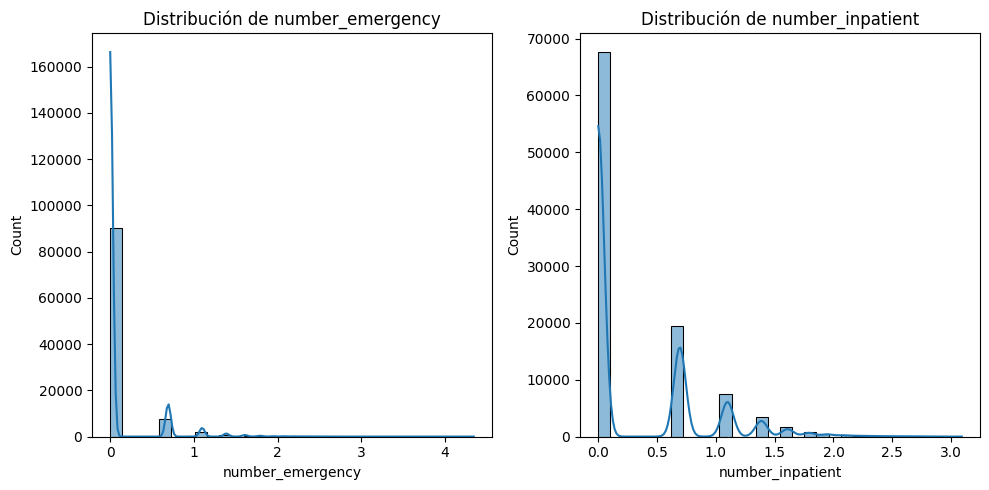

In [16]:
# Definir las columnas adicionales de interés
cols = log_transform_vars

num_vars = len(cols)
num_cols = 2
num_rows = math.ceil(num_vars / num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data_log_transformed[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

# Eliminar los subplots vacíos si hay alguno
for i in range(num_vars, num_cols*num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


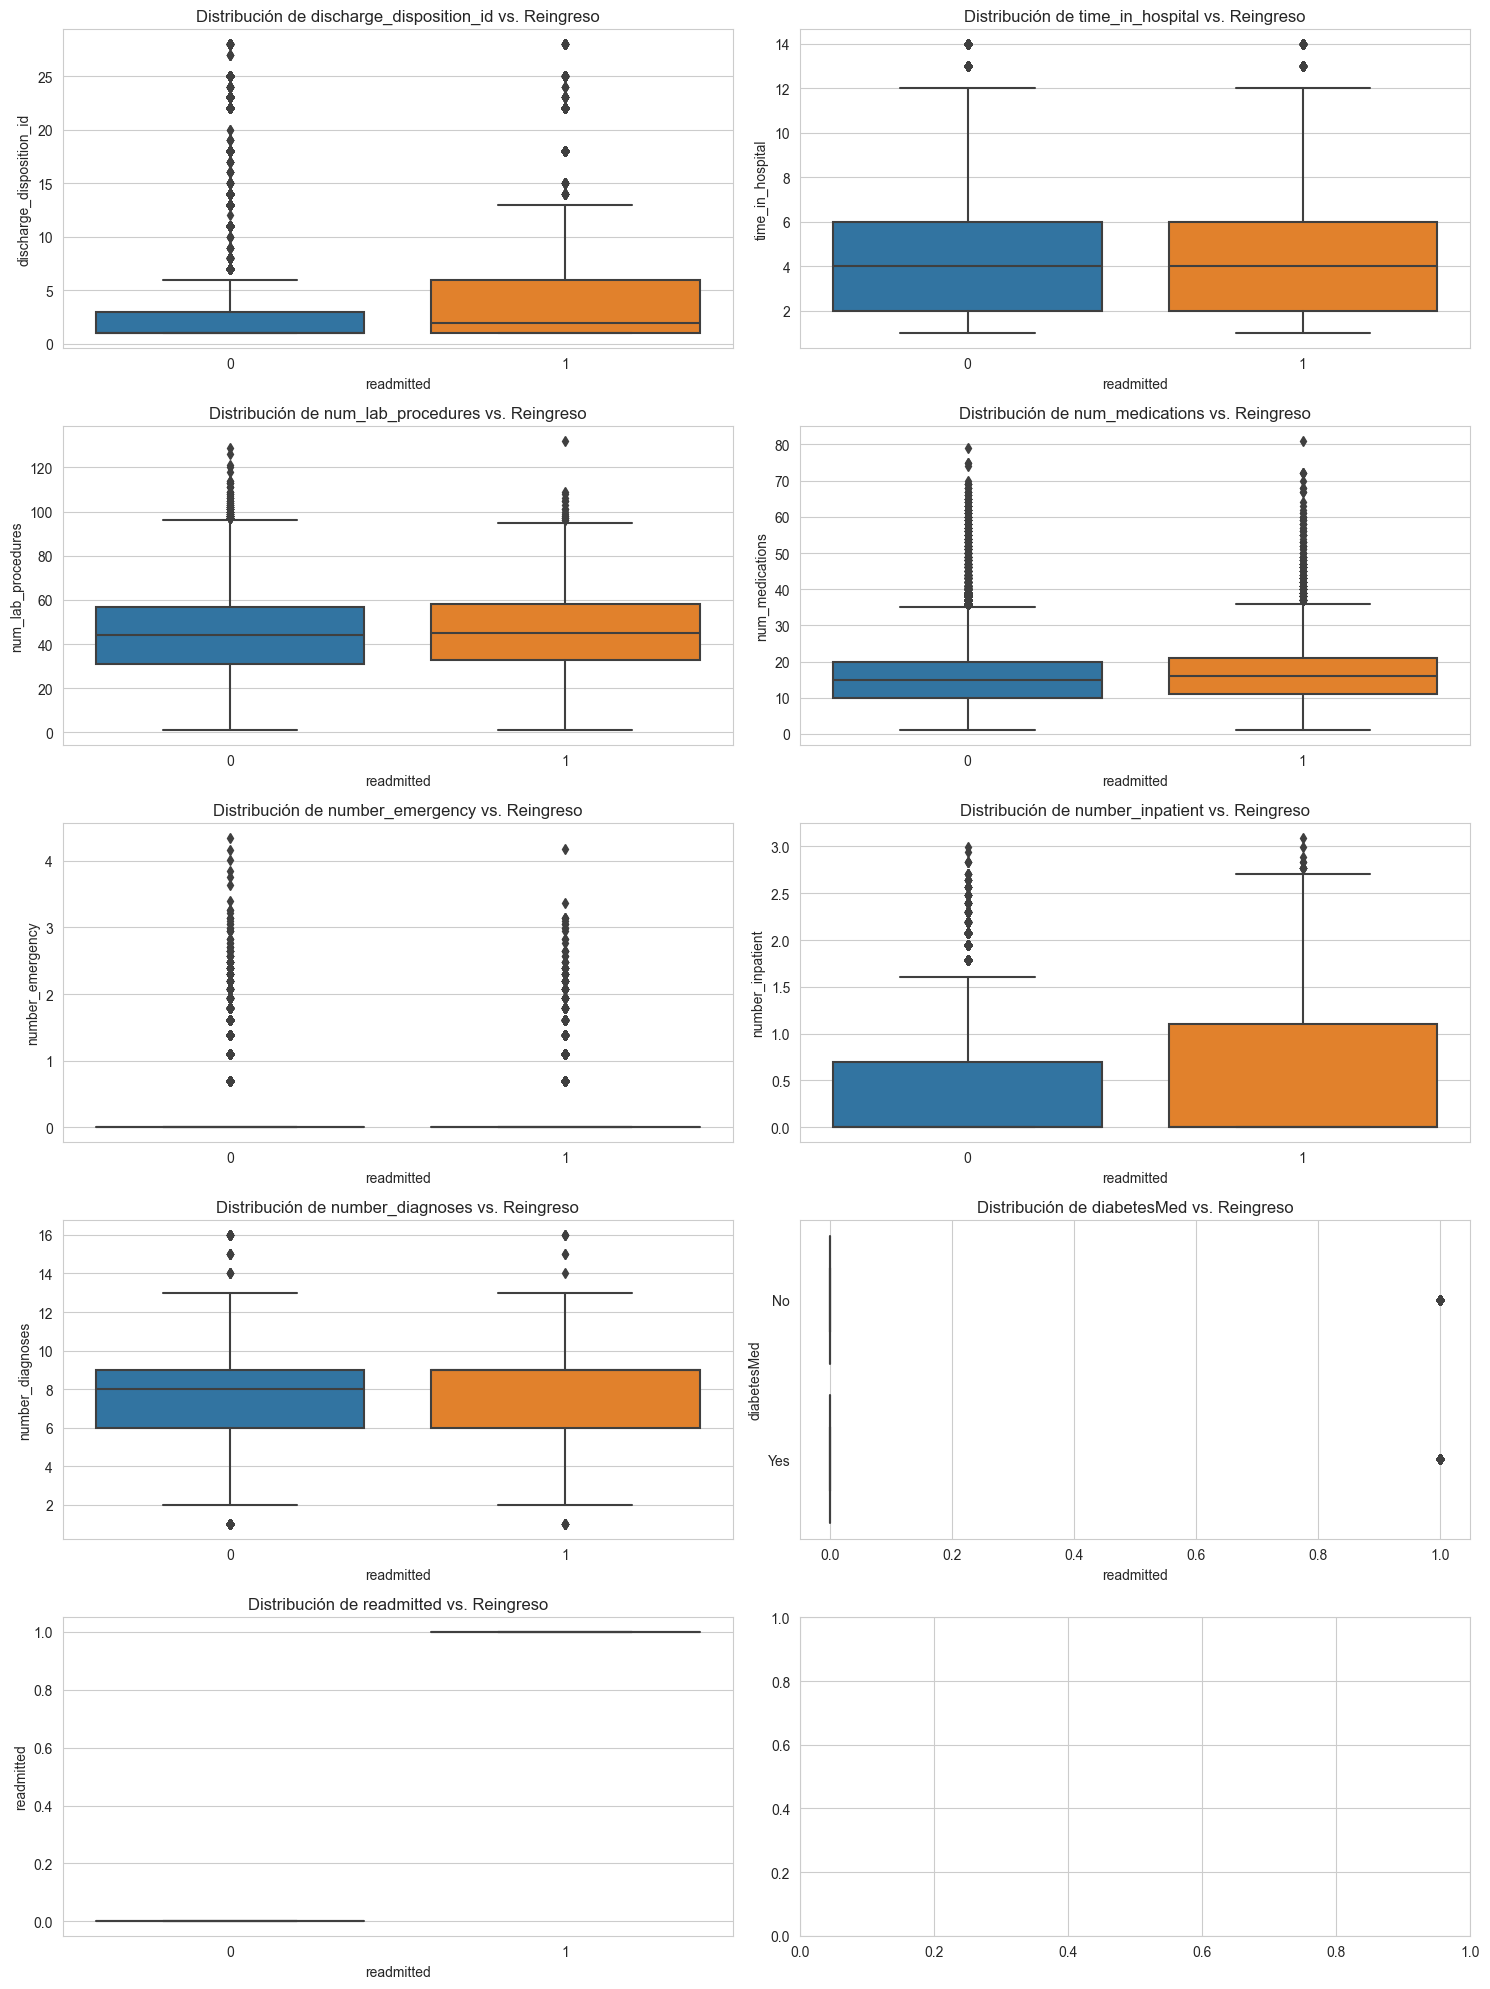

In [19]:
# Configuración de estilos de Seaborn
sns.set_style("whitegrid")

# Definir las columnas adicionales de interés
cols = data_log_transformed.columns[:]

num_vars = len(cols)
num_cols = 2
num_rows = math.ceil(num_vars / num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))
axes = axes.flatten()

# Bucle para visualizar las distribuciones
for i, col in enumerate(cols):
    sns.boxplot(x='readmitted', y=col, data=data_log_transformed, ax=axes[i])
    axes[i].set_title(f"Distribución de {col} vs. Reingreso")

plt.tight_layout()
plt.show()
